In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [138]:
raw_df = pd.DataFrame(pd.read_csv('./loan.csv'))

In [139]:
raw_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [140]:
df = raw_df.copy()

# handling non_existing data

In [141]:
raw_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### gender

In [142]:
raw_df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [143]:
df['Gender'] = df['Gender'].fillna('Male')

#### married

In [144]:
raw_df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [145]:
df['Married'] = df['Married'].fillna('Yes')

#### dependents

In [146]:
type(df['Dependents'][0])

str

In [147]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [148]:
df['Dependents'] = df['Dependents'].fillna(0)

#### self_employed

In [149]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [150]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

#### loan_amount

<Axes: >

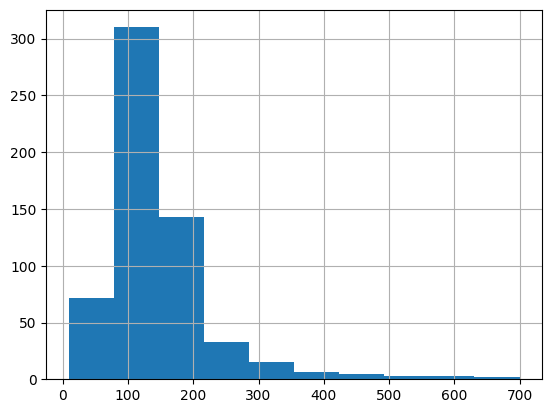

In [151]:
df['LoanAmount'].hist()

In [152]:
mean_loan_amount = np.mean(df['LoanAmount'])
mean_loan_amount

np.float64(146.41216216216216)

In [153]:
df['LoanAmount'] = df['LoanAmount'].fillna(mean_loan_amount)

#### loan amount term

In [154]:
mean_loan_term = np.mean(df['Loan_Amount_Term'])

In [155]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(mean_loan_term)

#### credit history

In [156]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [157]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [158]:
raw_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [160]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# features encoding

In [171]:
df_nan_cleaned = df.copy()   # to keep un changed the last version to be sure

In [162]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [163]:
cols_to_encode =  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [166]:
for i in range(len(df)) :
    df['Dependents'][i] = str(df['Dependents'][i])

C:\Users\Pacific\AppData\Local\Temp\ipykernel_61824\3919163356.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Dependents'][i] = str(df['Dependents'][i])
C:\Users\Pacific\AppData\Local\Temp\ipykernel_61824\3919163356.py:2: SettingWit

In [167]:
encoded_array = encoder.fit_transform(df[cols_to_encode])

In [168]:
encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out(cols_to_encode))

In [169]:
df = pd.concat([df.drop(cols_to_encode, axis = 1), encoded_df], axis = 1)

In [170]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [172]:
df.to_parquet('dataset_non_normalized.parquet')

# normalization

normalization is essential because having features in very different scales causes the training process to decrease in performance. because for example in gradient descent process the length of walking in the weights space will be very great in one dimension and so small in the other. and so we will have fluctuations in training process...

In [173]:
df_encoded = df.copy()

In [174]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### which scaler ? MinMaxScaler or StandardScaler :

In [178]:
cols_to_analyse_for_choosing_scaler = list(set(raw_df.columns) - set(cols_to_encode))

In [180]:
for i in cols_to_analyse_for_choosing_scaler :
    if type(df[i][0]) != np.ndarray :
        print(i, np.min(list(df[i])), np.max(list(df[i])))

LoanAmount 9.0 700.0
Credit_History 0.0 1.0
Loan_Amount_Term 12.0 480.0
ApplicantIncome 150 81000
CoapplicantIncome 0.0 41667.0


i analyse these features to choose between MinMaxScaler and StandardScaler :

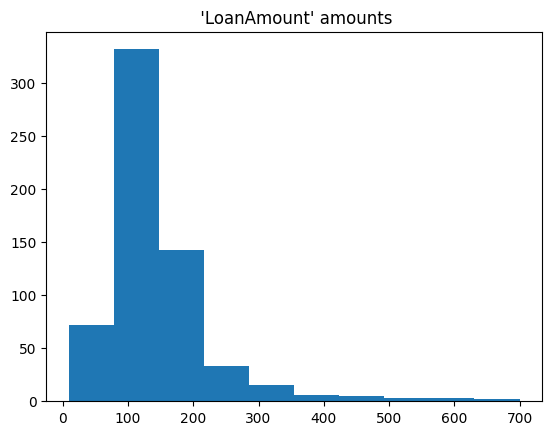

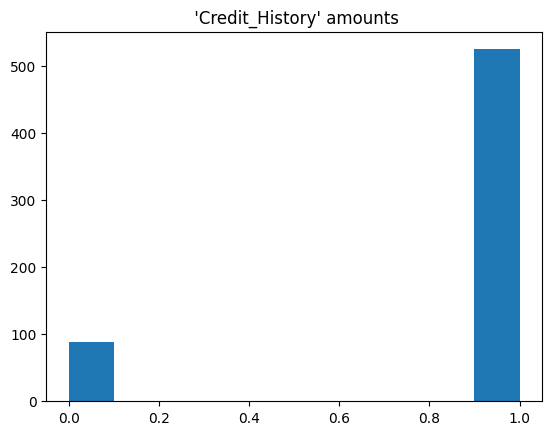

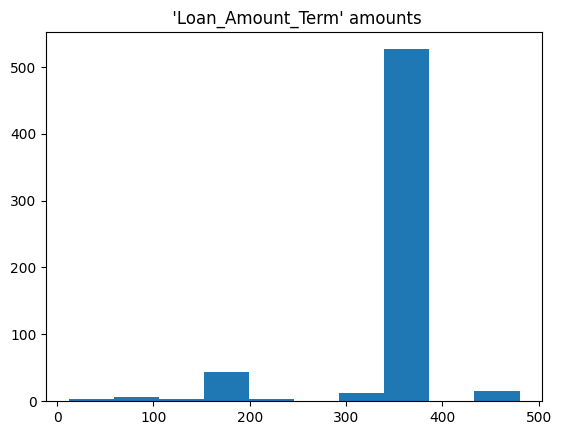

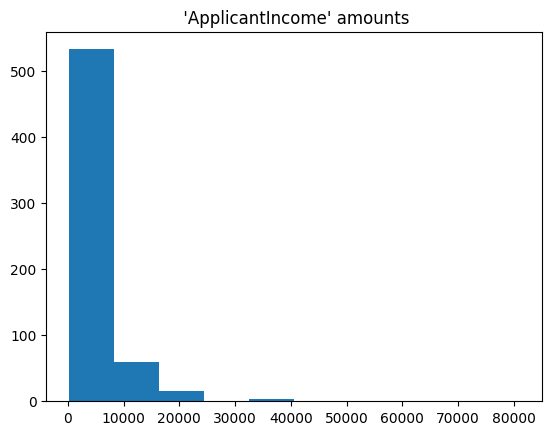

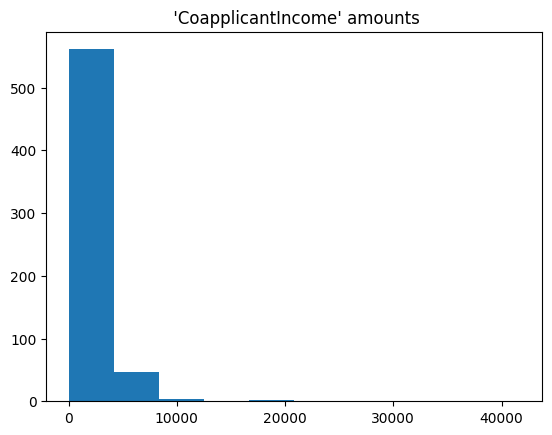

In [181]:
for i in cols_to_analyse_for_choosing_scaler :
        plt.hist(list(df[i]))
        plt.title(f" '{i}' amounts")
        plt.show()

data has outliers. so asking deep seek, its better to use StandardScaler

In [182]:
scaler = StandardScaler()

In [183]:
numeric_cols_to_rescale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [184]:
df[numeric_cols_to_rescale] = scaler.fit_transform(df[numeric_cols_to_rescale])

In [185]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.072991,-0.554487,0.000000,0.279851,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.134412,-0.038732,-0.219273,0.279851,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.393747,-0.554487,-0.957641,0.279851,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.462062,0.251980,-0.314547,0.279851,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.097728,-0.554487,-0.064454,0.279851,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
610,-0.212557,-0.554487,-1.267279,-2.518655,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
611,0.437174,-0.472404,1.269371,0.279851,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
612,0.357064,-0.554487,0.483367,0.279851,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [186]:
for i in cols_to_analyse_for_choosing_scaler :
        print(i, np.min(list(df[i])), np.max(list(df[i])))

LoanAmount -1.6364629013556893 6.592764024731916
Credit_History 0.0 1.0
Loan_Amount_Term -5.1305932920418345 2.1455208312174943
ApplicantIncome -0.8606493225189494 12.38462278717314
CoapplicantIncome -0.5544873301529852 13.696173250494041


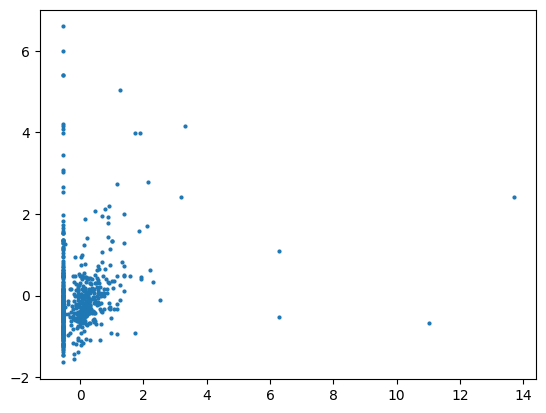

In [187]:
plt.scatter(df['CoapplicantIncome'], df['LoanAmount'], s = 4)

to scatter this i wanted to see if the variances of these features are not very different. because their max were different alot ... . now scaling method is chosen correctly

In [188]:
df.to_parquet('dataset_normalized.parquet')

splitting the data will be applied in models notebooks